# Machine Learning: Regression
## Main steps carried out:

### 1. Import libraries
### 2. Import Data
### 3. Data cleaning control
### 4. Data preparation I
### 5. Regression analysis
### 6.Compare how the regression fits the training set
### 7. Data preparation II
### 8. Regression analysis II
### 9.Compare how the regression fits the training set II

### 1. Import libraries

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Set display options to show all columns without truncation
pd.set_option('display.max_columns', None)

In [3]:
# Created charts are displayed in the notebook without the need to "call" them specifically
%matplotlib inline

In [4]:
# Creating a path for faster import and export
path=r"C:\Users\olilo\OneDrive\Dokumente\CF\Data Analytics Immersion_Week 14-15\2023-10-09 Airbnb Amsterdam"

In [20]:
# Set the color palette to "RuBu"
sns.set_palette("RdBu")

### 2. Import Data

In [7]:
# Import datafarme
df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'df_maps.csv'), index_col = False)

In [10]:
# Output check df_list
df.shape

(8386, 15)

In [12]:
df.head()

,Unnamed: 0,id,host_id,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,price_groups
0,0,761411,4013546,Noord-Oost,52.40164,4.95106,Private room,61,3,303,2.30,2,272,26,Averagely Low Price
1,1,768274,3678216,Westerpark,52.38855,4.88521,Entire home/apt,327,3,78,0.64,1,16,6,Increased Price
2,2,768737,3877342,Westerpark,52.37824,4.86826,Private room,109,2,341,2.73,3,29,43,Averagely Low Price
3,3,771217,4068486,Zuid,52.34091,4.84802,Entire home/apt,290,3,10,0.11,1,0,0,Increased Price
4,4,771343,2313061,Centrum-West,52.37641,4.88303,Private room,150,1,699,6.62,2,196,110,Average Price


### 3. Data cleaning control

In [13]:
# Check for missing values
df.isnull().sum()

Unnamed: 0                        0
id                                0
host_id                           0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
number_of_reviews_ltm             0
price_groups                      0
dtype: int64

In [15]:
# Duplicates check
dups = df.duplicated()

In [16]:
# No duolications
dups.shape 

(8386,)

### 4. Data preparation I

C:\Users\olilo\AppData\Local\Temp\ipykernel_1888\264471956.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price'], bins=50, color=sns.color_palette()[0])


<Axes: xlabel='price', ylabel='Density'>

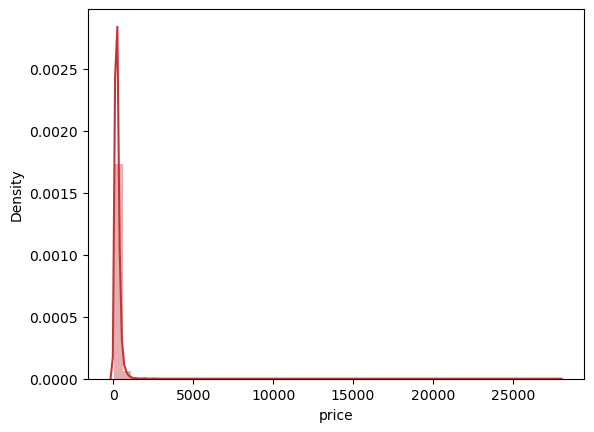

In [21]:
# Assuming you have a DataFrame named df with a 'price' column
sns.distplot(df['price'], bins=50, color=sns.color_palette()[0])

In [31]:
df.describe()

,Unnamed: 0,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,8386.000000,8.386000e+03,8.386000e+03,8386.000000,8386.000000,8386.000000,8386.000000,8386.000000,8386.000000,8386.000000,8386.000000,8386.000000
mean,4192.500000,2.973884e+17,1.077878e+08,52.366603,4.889834,254.489864,5.046625,45.437753,1.175696,1.831624,82.825066,10.848080
std,2420.974012,3.905819e+17,1.448316e+08,0.017191,0.035403,395.468275,34.710395,107.352805,2.139257,2.857336,113.568083,30.815465
min,0.000000,2.818000e+03,3.159000e+03,52.290340,4.755870,18.000000,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000
25%,2096.250000,1.851464e+07,1.025536e+07,52.355640,4.865501,150.000000,2.000000,3.000000,0.300000,1.000000,0.000000,0.000000
50%,4192.500000,4.242761e+07,3.642318e+07,52.365769,4.887580,207.000000,3.000000,10.000000,0.680000,1.000000,18.000000,3.000000
75%,6288.750000,7.227894e+17,1.444334e+08,52.376440,4.908708,300.000000,4.000000,36.000000,1.175696,1.000000,142.000000,8.000000
max,8385.000000,9.722182e+17,5.349544e+08,52.425159,5.026430,27857.000000,1001.000000,3199.000000,120.110000,27.000000,365.000000,1689.000000


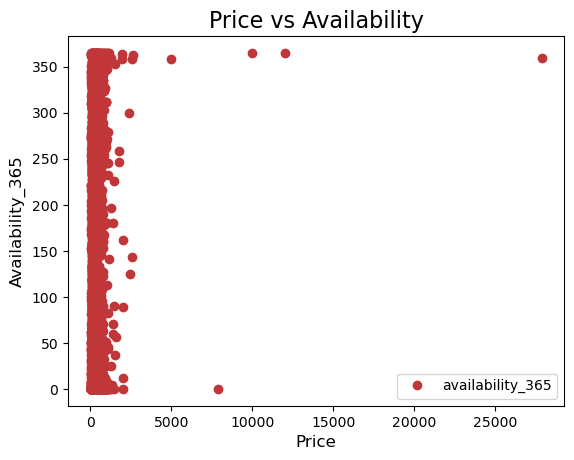

In [24]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.
df.plot(x = 'price', y='availability_365',style='o') 

plt.title('Price vs Availability', fontsize=16)  
plt.xlabel('Price', fontsize=12) 
plt.ylabel('Availability_365', fontsize=12)  

plt.show()

In [32]:
# Reshape the variables into NumPy arrays and put them into separate objects
X = df['price'].values.reshape(-1,1)
y = df['availability_365'].values.reshape(-1,1)

In [34]:
# Output check
print(X)

[[ 61]
 [327]
 [109]
 ...
 [135]
 [160]
 [211]]


In [35]:
# Output check
print(y)

[[272]
 [ 16]
 [ 29]
 ...
 [ 13]
 [  6]
 [ 55]]


In [36]:
# Split data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### 5. Regression analysis

In [37]:
# Create a regression object
regression = LinearRegression()

In [38]:
# Fit the regression object onto the training set
regression.fit(X_train, y_train)

LinearRegression()

In [39]:
# Predict the values of y using X.
y_predicted = regression.predict(X_test)

In [42]:
# Define the name of the color palette as a string
palette_name = "RdBu"

# Get the color palette
colors = sns.color_palette(palette_name)

# Convert the colors to hexadecimal values and print them
hex_colors = [color for color in colors.as_hex()]
print(hex_colors)

['#c13639', '#f09c7b', '#fbe3d4', '#dbeaf2', '#87beda', '#2f79b5']


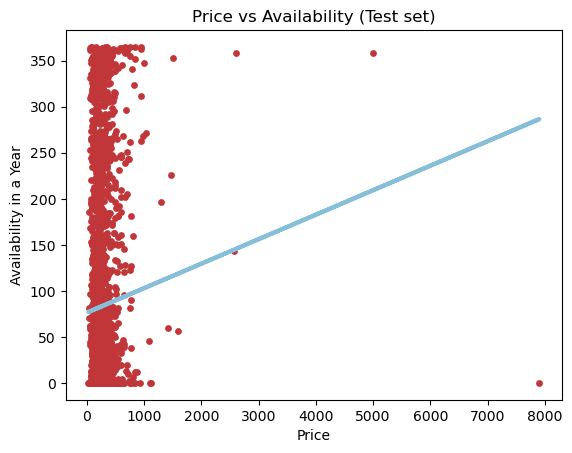

In [45]:
# Create a plot that shows the regression line from the model on the test set
plot_test = plt

plot_test.scatter(X_test, y_test, color='#c13639', s = 15)
plot_test.plot(X_test, y_predicted, color='#87beda', linewidth =3)

plot_test.title('Price vs Availability (Test set)')
plot_test.xlabel('Price')
plot_test.ylabel('Availability in a Year')

plot_test.show()

In [46]:
# Create objects that contain the model summary statistics
rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score 

In [47]:
# Print the model summary statistics. This is where you evaluate the performance of the model
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.02663048]]
Mean squared error:  12684.540171594761
R2 score:  0.010451880333079089


In [48]:
# Checking data
y_predicted

array([[82.71622112],
       [81.54447988],
       [81.46458843],
       ...,
       [79.17436692],
       [79.9732814 ],
       [80.90534829]])

In [49]:
# Create a dataframe comparing the actual and predicted values of y
data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,0,82.716221
1,0,81.544480
2,2,81.464588
3,35,87.083620
4,40,78.455344
5,260,83.701549
6,0,84.846660
7,27,82.636330
8,45,82.316764
9,254,80.825457


### 6.Compare how the regression fits the training set

In [50]:
# Predict
y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [51]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [52]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.02663048]]
Mean squared error:  12788.694437257232
R2 score:  0.010871400631120465


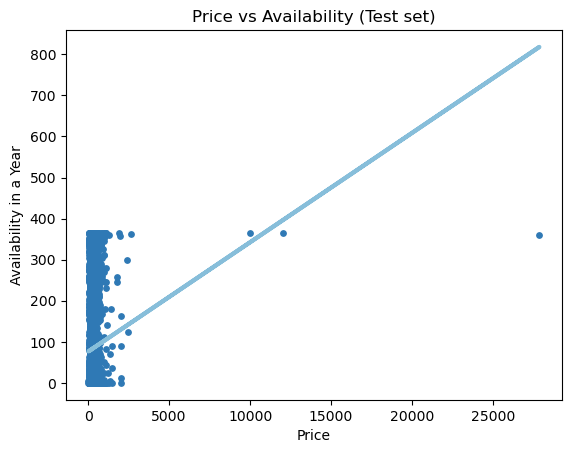

In [53]:
# Visualizing the training set results

plot_test = plt
plot_test.scatter(X_train, y_train, color='#2f79b5', s = 15)
plot_test.plot(X_train, y_predicted_train, color='#87beda', linewidth =3)

plot_test.title('Price vs Availability (Test set)')
plot_test.xlabel('Price')
plot_test.ylabel('Availability in a Year')

plot_test.show()

Hypothesis: The lower the availability in a year, the higher the accommodation price.

The regression line seems to have a positive regression, which means that the higher the price of accommodation, the more days a year the place is available, i.e. it does not bring any profit. However, although the line has a positive slope, it is not very close to the plots, on the contrary, most of the activity occurs outside the line.

Looking at
Slope: [[0.02663048]]
Mean squared error: 12684.540171594761
R2 score: 0.010451880333079089

Positive slope indicates a positive relationship (as X rises, so does y) it is minimal, so the mutual coefficient is small but positive.

The root mean squared error (MSE) shows how close a regression line is to a set of points, in this case the distance is very large and the points are away from the regression line. Therefore, the relationship is not good, on the contrary.

From this we conclude that this model did not perform well in the testing phase.
The greatest influence has the outliners in the price column, which make a huge difference, but belong to the dataset and reflect the truth of the data.

### 7. Data preparation II

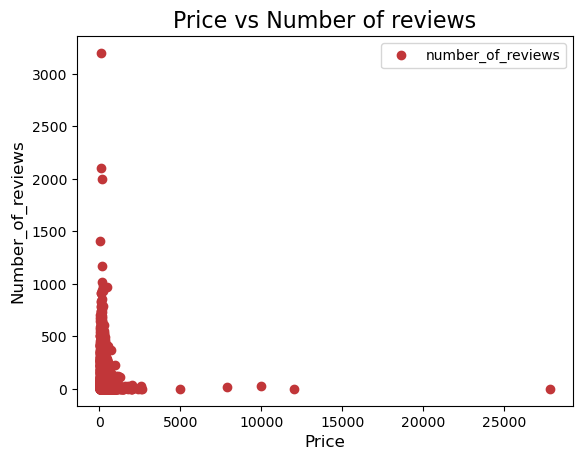

In [25]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.
df.plot(x = 'price', y='number_of_reviews',style='o') 

plt.title('Price vs Number of reviews', fontsize=16)  
plt.xlabel('Price', fontsize=12) 
plt.ylabel('Number_of_reviews', fontsize=12)  

plt.show()

In [55]:
# Reshape the variables into NumPy arrays and put them into separate objects
X1 = df['price'].values.reshape(-1,1)
y1 = df['number_of_reviews'].values.reshape(-1,1)

In [56]:
# Output check
print(X1)

[[ 61]
 [327]
 [109]
 ...
 [135]
 [160]
 [211]]


In [57]:
# Output check
print(y1)

[[303]
 [ 78]
 [341]
 ...
 [  0]
 [  0]
 [  0]]


In [58]:
# Split data into a training set and a test set
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3, random_state=0)

### 8. Regression analysis II

In [59]:
# Create a regression object
regression = LinearRegression()

In [60]:
# Fit the regression object onto the training set
regression.fit(X1_train, y1_train)

LinearRegression()

In [61]:
# Predict the values of y using X.
y1_predicted = regression.predict(X1_test)

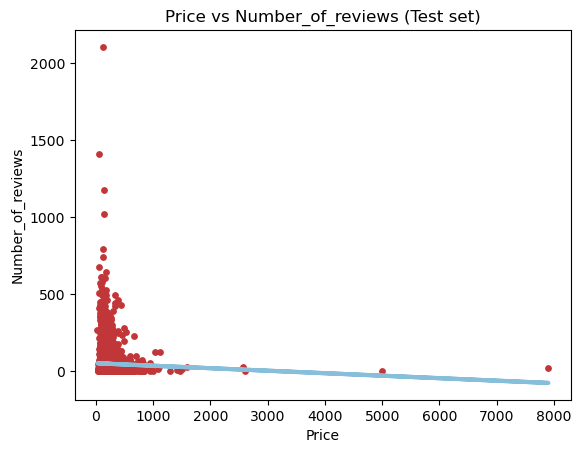

In [62]:
# Create a plot that shows the regression line from the model on the test set
plot_test = plt

plot_test.scatter(X1_test, y1_test, color='#c13639', s = 15)
plot_test.plot(X1_test, y1_predicted, color='#87beda', linewidth =3)

plot_test.title('Price vs Number_of_reviews (Test set)')
plot_test.xlabel('Price')
plot_test.ylabel('Number_of_reviews')

plot_test.show()

In [64]:
# Create objects that contain the model summary statistics
rmse = mean_squared_error(y1_test, y1_predicted) # This is the mean squared error
r2 = r2_score(y1_test, y1_predicted) # This is the R2 score 

In [65]:
# Print the model summary statistics. This is where you evaluate the performance of the model
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-0.01621843]]
Mean squared error:  10926.8748680619
R2 score:  0.006761821502453524


In [66]:
# Checking data
y1_predicted

array([[45.81057239],
       [46.52418345],
       [46.57283875],
       ...,
       [47.967624  ],
       [47.48107101],
       [46.91342585]])

In [67]:
# Create a dataframe comparing the actual and predicted values of y
data_1 = pd.DataFrame({'Actual': y1_test.flatten(), 'Predicted': y1_predicted.flatten()})
data_1.head(30)

,Actual,Predicted
0,1,45.810572
1,26,46.524183
2,3,46.572839
3,12,43.150749
4,331,48.405522
5,0,45.210490
6,15,44.513098
7,0,45.859228
8,2,46.053849
9,4,46.962081


### 9.Compare how the regression fits the training set II

In [68]:
# Predict
y1_predicted_train = regression.predict(X1_train) # This is predicting X_train!

In [69]:
rmse = mean_squared_error(y1_train, y1_predicted_train)
r2 = r2_score(y1_train, y1_predicted_train)

In [70]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-0.01621843]]
Mean squared error:  11694.769048522108
R2 score:  0.0044380816624953745


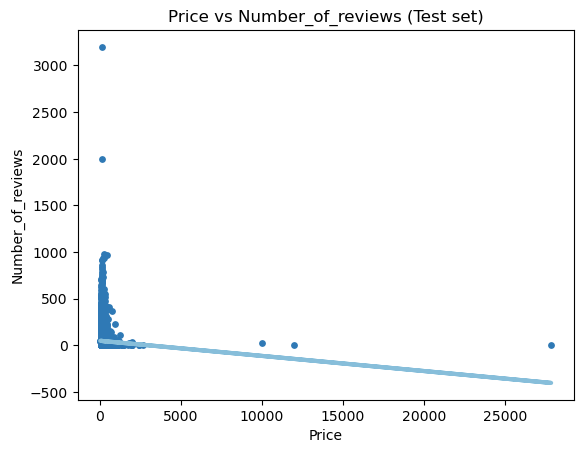

In [73]:
# Visualizing the training set results

plot_test = plt
plot_test.scatter(X1_train, y1_train, color='#2f79b5', s = 15)
plot_test.plot(X1_train, y1_predicted_train, color='#87beda', linewidth =3)

plot_test.title('Price vs Number_of_reviews (Test set)')
plot_test.xlabel('Price')
plot_test.ylabel('Number_of_reviews')

plot_test.show()

Hypothesis:The lower rental price affects the number of opinions issued.

The regression line in this model is negative, which means that the higher the accommodation price, the fewer opinions left by customers. Again, most of the points are off the line.

Slope: [[-0.01621843]]
Mean Square Error: 10926.8748680619
R2 result: 0.006761821502453524

The negative slope means that there is no, or even negative, relationship between the price and the opinions expressed, which means x, i.e. the price increases, and y, i.e. the number of opinions expressed decreases.

Also in this case, the root mean square error (MSE) shows a great distance of points from the regression line.

From this we conclude that this model did not perform well in the testing phase. The biggest impact comes from the outlines in the price column, which make a huge difference, but are part of the data set and reflect the truth of the data.

In [74]:
# saving to csv
df.to_csv(os.path.join(path, '02 Data','prepared data', 'data_MLR.csv'))